# Ames Project

In [374]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [297]:
dataset = pd.read_csv('./data/dataset.csv')

In [199]:
dataset.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn
1082,2543,85,RL,75.0,9825,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,5,5,1967,1967,Gable,CompShg,HdBoard,HdBoard,BrkFace,162.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,936.0,Unf,0.0,0.0,936.0,GasA,Gd,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,4,Typ,1,Fa,Attchd,1967.0,Unf,1.0,384.0,TA,TA,Y,405,0,0,0,0,0,NaN,NaN,Shed,450,8,2007,WD,Abnorml,99,200708,288.36,6.575,47162.0,2.8,3.569740
2325,867,20,RL,67.0,10656,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,274.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1638.0,1638.0,GasA,Ex,Y,SBrkr,1646,0,0,1646,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3.0,870.0,TA,TA,Y,192,80,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,248900,200711,272.88,6.201,49336.0,2.6,3.716740
1019,2480,80,RL,65.0,14149,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,8,1964,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,50.0,Gd,Gd,CBlock,TA,TA,Gd,LwQ,68.0,BLQ,722.0,190.0,980.0,GasA,TA,Y,SBrkr,1020,0,0,1020,0.0,1.0,2,0,3,1,TA,5,Typ,1,Po,Detchd,1970.0,Unf,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,99,200705,334.04,6.131,47518.0,2.6,3.287290
1917,459,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,7,1925,1996,Hip,CompShg,Stucco,Wd Shng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,588.0,588.0,GasA,Fa,Y,SBrkr,833,833,0,1666,0.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1.0,228.0,TA,TA,Y,192,63,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,161000,200806,237.14,6.063,47000.0,3.8,4.710038
2804,1346,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,4,1920,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,250.0,Unf,0.0,710.0,960.0,GasA,Gd,Y,FuseA,960,0,0,960,0.0,0.0,1,0,2,1,Fa,5,Typ,0,NaN,Detchd,1997.0,Unf,1.0,308.0,TA,TA,Y,0,0,168,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,108500,200707,276.52,6.606,46881.0,2.8,3.476770


In [298]:
dataset.shape

(2919, 87)

### Impute Missing Values

In [299]:
missing_data = dataset.isna().sum(axis=0)
missing_data[missing_data > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

Remove columns if missing more than 90% of observations

In [192]:
# many_missing = missing_data/dataset.shape[0]
# many_missing = many_missing[many_missing > 0.90]
# dataset.drop(many_missing.index.values, axis=1, inplace=True)
# dataset.shape

(2919, 79)

Impute missing values in remaining columns.

#### Missing values

- MSZoning
- LotFrontage
- Alley
- Utilities
- Exterior1st
- Exterior2nd
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- Electrical
- BsmtFullBath
- BsmtHalfBath
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageCars
- GarageArea
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature
- SaleType

In [300]:
## MSZoning - use the mode of neighborhood
dataset['MSZoning'] = dataset.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))
## LotFrontage
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
## Alley - NA means no alley access
dataset["Alley"] = dataset.loc[:, "Alley"].fillna("None")
## Utilities
dataset.loc[:, "Utilities"] = dataset.loc[:, "Utilities"].fillna("AllPub")
## Exterior1st -????
dataset["Exterior1st"] = dataset.groupby("Neighborhood")["Exterior1st"].transform(lambda x: x.fillna(x.mode()[0]))
## Exterior2nd
dataset["Exterior2nd"] = dataset.groupby("Neighborhood")["Exterior2nd"].transform(lambda x: x.fillna(x.mode()[0]))
##### or
# dataset.loc[:, "Exterior2nd"] = dataset.loc[:, "Exterior2nd"].fillna("None")
## MasVnrType
dataset.loc[:, "MasVnrType"] = dataset.loc[:, "MasVnrType"].fillna("None")
## MasVnrArea
dataset.loc[:, "MasVnrArea"] = dataset.loc[:, "MasVnrArea"].fillna(0)
## BsmtQual
dataset.loc[:, "BsmtQual"] = dataset.loc[:, "BsmtQual"].fillna("No")
## BsmtCond
dataset.loc[:, "BsmtCond"] = dataset.loc[:, "BsmtCond"].fillna("No")
## BsmtExposure
dataset.loc[:, "BsmtExposure"] = dataset.loc[:, "BsmtExposure"].fillna("No")
## BsmtFinType1
dataset.loc[:, "BsmtFinType1"] = dataset.loc[:, "BsmtFinType1"].fillna("No")
## BsmtFinSF1
dataset.loc[:, "BsmtFinSF1"] = dataset.loc[:, "BsmtFinSF1"].fillna(0)
## BsmtFinType2
dataset.loc[:, "BsmtFinType2"] = dataset.loc[:, "BsmtFinType2"].fillna("No")
## BsmtFinSF2
dataset.loc[:, "BsmtFinSF2"] = dataset.loc[:, "BsmtFinSF2"].fillna(0)
## BsmtUnfSF
dataset.loc[:, "BsmtUnfSF"] = dataset.loc[:, "BsmtUnfSF"].fillna(0)
## BsmtFullBath
dataset.loc[:, "BsmtFullBath"] = dataset.loc[:, "BsmtFullBath"].fillna(0)
## BsmtHalfBath
dataset.loc[:, "BsmtHalfBath"] = dataset.loc[:, "BsmtHalfBath"].fillna(0)
## TotalBsmtSF
dataset.loc[:, "BsmtFinSF2"] = dataset.loc[:, "BsmtFinSF2"].fillna(0)
## Electrical
dataset["Electrical"] = dataset.groupby("Neighborhood")["Electrical"].transform(lambda x: x.fillna(x.mode()[0]))
## KitchenQual
dataset.loc[:, "KitchenQual"] = dataset.loc[:, "KitchenQual"].fillna("TA")
## Functional
dataset.loc[:, "Functional"] = dataset.loc[:, "Functional"].fillna("Typ")
## FireplaceQu
dataset.loc[:, "FireplaceQu"] = dataset.loc[:, "FireplaceQu"].fillna("No")
## GarageType
dataset.loc[:, "GarageType"] = dataset.loc[:, "GarageType"].fillna("No")
## GarageYrBlt - do we want 0 for year built??????????????????????????????????????????
dataset.loc[:, "GarageYrBlt"] = dataset.loc[:, "GarageYrBlt"].fillna(0)
## GarageFinish
dataset.loc[:, "GarageFinish"] = dataset.loc[:, "GarageFinish"].fillna("No")
## GarageCars
dataset.loc[:, "GarageCars"] = dataset.loc[:, "GarageCars"].fillna(0)
## GarageArea
dataset.loc[:, "GarageArea"] = dataset.loc[:, "GarageArea"].fillna(0)
## GarageQual
dataset.loc[:, "GarageQual"] = dataset.loc[:, "GarageQual"].fillna("No")
## GarageCond
dataset.loc[:, "GarageCond"] = dataset.loc[:, "GarageCond"].fillna("No")
## PoolQC
dataset.loc[:, "PoolQC"] = dataset.loc[:, "PoolQC"].fillna("No")
## Fence
dataset.loc[:, "Fence"] = dataset.loc[:, "Fence"].fillna("No")
## MiscFeature
dataset.loc[:, "MiscFeature"] = dataset.loc[:, "MiscFeature"].fillna("No")
## SaleType
dataset["SaleType"] = dataset.groupby("Neighborhood")["SaleType"].transform(lambda x: x.fillna(x.mode()[0]))

In [149]:
# dataset.groupby(['Neighborhood','Electrical']).count()

In [301]:
pd.options.display.max_columns = 100
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,99,201003,193.37,4.762,53639.0,4.6,3.734616
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,99,201001,168.83,4.993,52631.0,4.8,3.746940


## Feature Engineering

Remove ID column.

In [170]:
# dataset.drop(columns = ['Id'], inplace=True)
# dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,99,201003,193.37,4.762,53639.0,4.6
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,99,201001,168.83,4.993,52631.0,4.8


Change categorical types (listed as numerical) to categorial -- convert to datatype object
- MSSubClass
- OverallQual
- OverallCond
- MoSold
- YrSold

In [302]:
dataset['MSSubClass'] = dataset['MSSubClass'].astype('object')
dataset['OverallQual'] = dataset['OverallQual'].astype('category')
dataset['OverallCond'] = dataset['OverallCond'].astype('category')
dataset['MoSold'] = dataset['MoSold'].astype('category')
dataset['YrSold'] = dataset['YrSold'].astype('category')

In [303]:
print(dataset.dtypes['MSSubClass'])
print(dataset.dtypes['OverallQual'])
print(dataset.dtypes['OverallCond'])
print(dataset.dtypes['MoSold'])
print(dataset.dtypes['YrSold'])

object
category
category
category
category


Create levels for nurmerical categorical data.

In [304]:
dataset['OverallQual'] = pd.Categorical(dataset['OverallQual'], categories=[1,2,3,4,5,6,7,8,9,10], ordered=True)
dataset['OverallCond'] = pd.Categorical(dataset['OverallCond'], categories=[1,2,3,4,5,6,7,8,9,10], ordered=True)

Add a column with total square footage.

In [305]:
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

Add column with total number of bathrooms.

In [306]:
dataset['TotalBath'] = dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] * 0.5 + dataset['FullBath'] + dataset['HalfBath'] * 0.5

In [307]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,1778.0,1.0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2658.0,1.5
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,99,201003,193.37,4.762,53639.0,4.6,3.734616,2557.0,2.5
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2530.0,2.5
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,99,201001,168.83,4.993,52631.0,4.8,3.746940,2560.0,2.0


## Prepare Data for Linear Regression

In [364]:
new_test = pd.read_csv('./data/new_test.csv')
new_train = pd.read_csv('./data/new_train.csv')

In [365]:
new_train.drop(['Id'], axis = 1, inplace = True)
new_train = new_train.rename(columns={"Unnamed: 0": "Id"})
new_train = new_train.set_index('Id')

In [390]:
features = new_train.drop(['SalePrice'], axis = 1)
salePrice = new_train['SalePrice']
## get dummies
features = pd.get_dummies(features, drop_first = True)

In [367]:
new_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1459,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500,200802,244.57,5.534,49426.0,3.0,3.923512
1460,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500,200705,334.04,6.131,47518.0,2.6,3.287290
1461,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500,200809,241.88,6.208,49516.0,3.0,5.329546
1462,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000,200602,275.15,6.123,47959.0,2.9,2.139554
1463,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000,200812,145.63,5.140,49657.0,3.7,5.309256


In [391]:
pd.DataFrame(features.columns, columns=['Column_Name'])

,Column_Name
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


### Multiple Linear Regression

(array([  1.,   2.,   3.,  35., 676., 707.,  24.,   6.,   5.,   1.]),
 array([-1.76937285e+05, -1.41549828e+05, -1.06162371e+05, -7.07749139e+04,
        -3.53874569e+04, -2.14204192e-08,  3.53874569e+04,  7.07749139e+04,
         1.06162371e+05,  1.41549828e+05,  1.76937285e+05]),
 <a list of 10 Patch objects>)

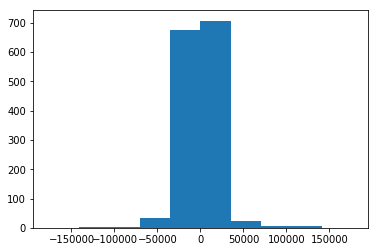

In [414]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, salePrice)
residuals = salePrice - lm.predict(features)
plt.hist(residuals)

In [415]:
print('R^2 is equal to %.3f' %(lm.score(features, salePrice)))
# print('RSS is equal to %.3f' %(np.sum((salePrice - lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.934


In [416]:
predicted = lm.predict(features)
predicted

array([209761.42416396, 205033.93036472, 205097.82741042, ...,
       275362.77960155, 142264.19406836, 150011.96085753])

### Multiple Linear Regression - log(price)

(array([  4.,   2.,   9.,  64., 604., 706.,  67.,   2.,   1.,   1.]),
 array([-6.91829548e-01, -5.53463638e-01, -4.15097729e-01, -2.76731819e-01,
        -1.38365910e-01, -7.72715225e-14,  1.38365910e-01,  2.76731819e-01,
         4.15097729e-01,  5.53463638e-01,  6.91829548e-01]),
 <a list of 10 Patch objects>)

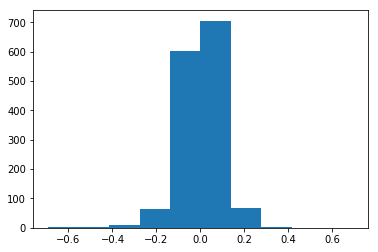

In [422]:
lm.fit(features, np.log(salePrice))
residuals = np.log(salePrice) - lm.predict(features)
plt.hist(residuals)

In [423]:
print('R^2 is equal to %.3f' %(lm.score(features, np.log(salePrice))))
# print('RSS is equal to %.3f' %(np.sum((np.log(salePrice) - lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.944


In [425]:
logpredicted = lm.predict(features)
np.exp(logpredicted)

array([206905.17838735, 200892.86952346, 213071.76155102, ...,
       277462.10178503, 143882.04152363, 146159.20079763])

### Feature Selection

Omit variables using KBest.

In [ ]:
from sklearn.feature_selection import SelectKBest



### Significant Coefficients

In [396]:
import statsmodels.api as sm
x = sm.add_constant(features)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(salePrice), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     79.89
Date:                Mon, 12 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:59:21   Log-Likelihood:                 1375.4
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1204   BIC:                            -885.5
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.34

In [399]:
pValues = results.pvalues
sigCoef = pValues[pValues<0.05]

In [427]:
sigCoef.shape

(63,)

## Multiple Linear Regression

Assumptions:
- linearity
- normality
- homoscedasticity
- independent error
- no multicollinearity

### Prepare data for modeling

In [ ]:
## Multiple Linear Regression
# linearity
# normality
# homoscedasticity
# independent error: Durbin-Watson
# no multicollinearity: Cond. No.

In [332]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,208500,200802,244.57,5.534,49426.0,3.0,3.923512,2566.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1460,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,181500,200705,334.04,6.131,47518.0,2.6,3.287290,2524.0,2.5,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,223500,200809,241.88,6.208,49516.0,3.0,5.329546,2706.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,140000,200602,275.15,6.123,47959.0,2.9,2.139554,2473.0,2.0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1463,5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,250000,200812,145.63,5.140,49657.0,3.7,5.309256,3343.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [333]:
x_train = train.drop(['Id','SalePrice'], axis = 1)
x_train = test.drop(['Id','SalePrice'], axis = 1)
y_train = train['SalePrice']
y_test = test['SalePrice']

In [335]:
x_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,201006,183.00,4.561,51950.0,4.7,3.610178,1778.0,1.0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,201006,183.00,4.561,51950.0,4.7,3.610178,2658.0,1.5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,201003,193.37,4.762,53639.0,4.6,3.734616,2557.0,2.5,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,201006,183.00,4.561,51950.0,4.7,3.610178,2530.0,2.5,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,201001,168.83,4.993,52631.0,4.8,3.746940,2560.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [336]:
all_data = pd.get_dummies(all_data)
all_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,208500,200802,244.57,5.534,49426.0,3.0,3.923512,2566.0,3.5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1460,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,181500,200705,334.04,6.131,47518.0,2.6,3.287290,2524.0,2.5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,223500,200809,241.88,6.208,49516.0,3.0,5.329546,2706.0,3.5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,140000,200602,275.15,6.123,47959.0,2.9,2.139554,2473.0,2.0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1463,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,250000,200812,145.63,5.140,49657.0,3.7,5.309256,3343.0,3.5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Fitting Models

Split data into training and test datasets

In [308]:
train = dataset.loc[dataset['SalePrice']!=99,:]
test = dataset.loc[dataset['SalePrice']==99,:]

In [309]:
print (train.shape)
print (test.shape)

(1460, 89)
(1459, 89)


In [242]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,1778.0,1.0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2658.0,1.5
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,99,201003,193.37,4.762,53639.0,4.6,3.734616,2557.0,2.5
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2530.0,2.5
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,99,201001,168.83,4.993,52631.0,4.8,3.746940,2560.0,2.0


In [310]:
all_data = pd.concat((train.loc[:,'MSSubClass':'TotalBath'],
                      test.loc[:,'MSSubClass':'TotalBath']))

In [311]:
x_train = train.drop(['Id','SalePrice'], axis = 1)
x_train = test.drop(['Id','SalePrice'], axis = 1)
y_train = train['SalePrice']
y_test = test['SalePrice']

In [312]:
print (x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)
print (x_train_trial2.shape)
print (x_test_trial2.shape)
print(y_train_trial2.shape)
print(y_test_trial2.shape)

(1460, 87)
(1459, 87)
(1460,)
(1459,)
(1460, 88)
(1459, 88)
(1460,)
(1459,)


In [313]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,1778.0,1.0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2658.0,1.5
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,99,201003,193.37,4.762,53639.0,4.6,3.734616,2557.0,2.5
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,99,201006,183.00,4.561,51950.0,4.7,3.610178,2530.0,2.5
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,99,201001,168.83,4.993,52631.0,4.8,3.746940,2560.0,2.0


In [314]:
x_train_trial2 = all_data[:train.shape[0]]
x_test_trial2 = all_data[train.shape[0]:]
y_train_trial2 = train['SalePrice']
y_test_trial2 = test['SalePrice']

In [315]:
X = pd.get_dummies(dataset.drop(['SalePrice'], axis = 1), drop_first=True)
Y = dataset['SalePrice']

In [348]:
X.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Month,DJREI,Fannie,LaborForce,UnemplRate,Corn,TotalSF,TotalBath,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,208500,200802,244.57,5.534,49426.0,3.0,3.923512,2566.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1460,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,181500,200705,334.04,6.131,47518.0,2.6,3.287290,2524.0,2.5,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,223500,200809,241.88,6.208,49516.0,3.0,5.329546,2706.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,140000,200602,275.15,6.123,47959.0,2.9,2.139554,2473.0,2.0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1463,5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,250000,200812,145.63,5.140,49657.0,3.7,5.309256,3343.0,3.5,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
